In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from google.colab import files
uploaded = files.upload()

Saving tracks_for_eval.pkl to tracks_for_eval.pkl


In [5]:
# Load the data
X_train = pd.read_pickle('updated_X_train.pkl')
y_train = pd.read_pickle('updated_y_train.pkl')
X_test = pd.read_pickle('updated_X_test.pkl')
y_test = pd.read_pickle('updated_y_test.pkl')
X_recommend = pd.read_pickle('updated_X_recommend.pkl')

In [7]:
eval_tracks = pd.read_pickle('tracks_for_eval.pkl')

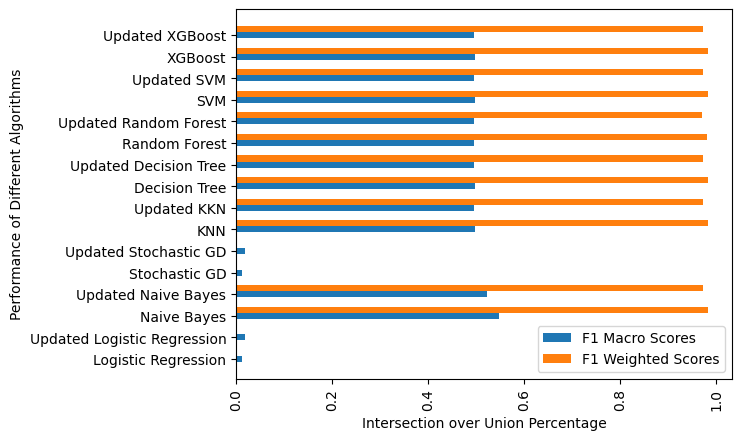

In [8]:
f = open("/content/drive/MyDrive/year 29/Data Science /notebooks/spotify/model/f1_scores.json")
f1_scores = json.load(f)
f.close()

x_axis_labels = [
    'Logistic Regression',
    'Updated Logistic Regression',
    'Naive Bayes',
    'Updated Naive Bayes',
    'Stochastic GD',
    'Updated Stochastic GD',
    'KNN',
    'Updated KKN',
    'Decision Tree',
    'Updated Decision Tree',
    'Random Forest',
    'Updated Random Forest',
    'SVM',
    'Updated SVM',
    'XGBoost',
    'Updated XGBoost']

# F1 Marco Avgs
f1_macro_averages = [f1_scores['logistic_regression']['f1_macro_average'],
                     f1_scores['updated_logistic_regression']['f1_macro_average'],
                     f1_scores['naive_bayes']['f1_macro_average'],
                     f1_scores['updated_naive_bayes']['f1_macro_average'],
                     f1_scores['stochastic_gradient_descent']['f1_macro_average'],
                     f1_scores['updated_stochastic_gradient_descent']['f1_macro_average'],
                     f1_scores['k_nearest_neighbours']['f1_macro_average'],
                     f1_scores['updated_k_nearest_neighbours']['f1_macro_average'],
                     f1_scores['decision_tree']['f1_macro_average'],
                     f1_scores['updated_decision_tree']['f1_macro_average'],
                     f1_scores['random_forest']['f1_macro_average'],
                     f1_scores['updated_random_forest']['f1_macro_average'],
                     f1_scores['support_vector_machine']['f1_macro_average'],
                     f1_scores['updated_support_vector_machine']['f1_macro_average'],
                     f1_scores['xgboost']['f1_macro_average'],
                     f1_scores['updated_xgboost']['f1_macro_average']]

# F1 weighted averages
f1_weighted_averages = [f1_scores['logistic_regression']['f1_weighted_average'],
                        f1_scores['updated_logistic_regression']['f1_weighted_average'],
                        f1_scores['naive_bayes']['f1_weighted_average'],
                        f1_scores['updated_naive_bayes']['f1_weighted_average'],
                        f1_scores['stochastic_gradient_descent']['f1_weighted_average'],
                        f1_scores['updated_stochastic_gradient_descent']['f1_weighted_average'],
                        f1_scores['k_nearest_neighbours']['f1_weighted_average'],
                        f1_scores['updated_k_nearest_neighbours']['f1_weighted_average'],
                        f1_scores['decision_tree']['f1_weighted_average'],
                        f1_scores['updated_decision_tree']['f1_weighted_average'],
                        f1_scores['random_forest']['f1_weighted_average'],
                        f1_scores['updated_random_forest']['f1_weighted_average'],
                        f1_scores['support_vector_machine']['f1_weighted_average'],
                        f1_scores['updated_support_vector_machine']['f1_weighted_average'],
                        f1_scores['xgboost']['f1_weighted_average'],
                        f1_scores['updated_xgboost']['f1_weighted_average']]

# plot
fig = plt.figure()
w = 0.28
X_axis_1 = np.arange(len(x_axis_labels))
X_axis_2 = [i+w for i in X_axis_1]

plt.barh(X_axis_1, f1_macro_averages, w, label='F1 Macro Scores')
plt.barh(X_axis_2, f1_weighted_averages, w, label='F1 Weighted Scores')

plt.yticks(X_axis_1, x_axis_labels)
plt.xticks(rotation=90)
plt.xlabel("Intersection over Union Percentage")
plt.ylabel("Performance of Different Algorithms")
plt.legend()
plt.show()


So updating the data made little to no difference. Why are SGD and LR so much lower? Also why are the marco F1 scores so much lower than the weighted. Was the dataset unbalanced?

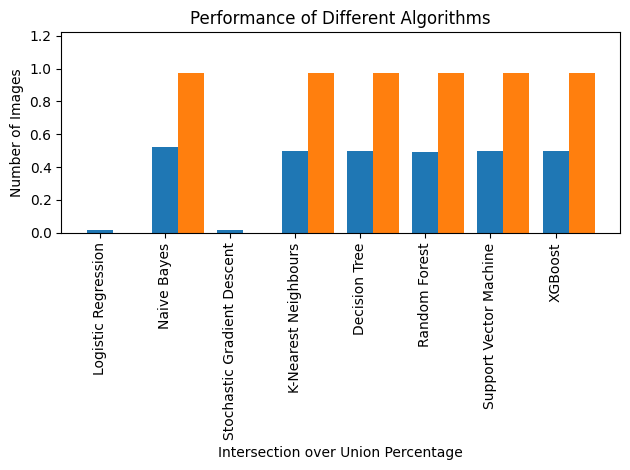

In [9]:
# looking at just the updated data
x_axis_labels = ['Logistic Regression',
                 'Naive Bayes',
                 'Stochastic Gradient Descent',
                 'K-Nearest Neighbours',
                 'Decision Tree',
                 'Random Forest',
                 'Support Vector Machine',
                 'XGBoost']

# F1 macro averages
f1_macro_averages = [f1_scores['updated_logistic_regression']['f1_macro_average'],
                     f1_scores['updated_naive_bayes']['f1_macro_average'],
                     f1_scores['updated_stochastic_gradient_descent']['f1_macro_average'],
                     f1_scores['updated_k_nearest_neighbours']['f1_macro_average'],
                     f1_scores['updated_decision_tree']['f1_macro_average'],
                     f1_scores['updated_random_forest']['f1_macro_average'],
                     f1_scores['updated_support_vector_machine']['f1_macro_average'],
                     f1_scores['updated_xgboost']['f1_macro_average']]

# F1 weighted averages
f1_weighted_averages = [f1_scores['updated_logistic_regression']['f1_weighted_average'],
                     f1_scores['updated_naive_bayes']['f1_weighted_average'],
                     f1_scores['updated_stochastic_gradient_descent']['f1_weighted_average'],
                     f1_scores['updated_k_nearest_neighbours']['f1_weighted_average'],
                     f1_scores['updated_decision_tree']['f1_weighted_average'],
                     f1_scores['updated_random_forest']['f1_weighted_average'],
                     f1_scores['updated_support_vector_machine']['f1_weighted_average'],
                     f1_scores['updated_xgboost']['f1_weighted_average']]


fig = plt.figure()
w = 0.4
X_axis_1 = np.arange(len(x_axis_labels))
X_axis_2 = [i+w for i in X_axis_1]

plt.bar(X_axis_1, f1_macro_averages, w, label='F1 macro averages')
plt.bar(X_axis_2, f1_weighted_averages, w, label='F1 weighted averages')


plt.xticks(X_axis_1, x_axis_labels)
plt.xticks(rotation=90)
plt.xlabel("Intersection over Union Percentage")
plt.ylabel("Number of Images")
plt.title("Performance of Different Algorithms")


# Set y-axis limits to focus on upper limits
plt.gca().set_ylim(plt.gca().get_ylim()[0], plt.gca().get_ylim()[1] + 0.2)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

It's hard to tell these lines apart. Reviewing the number however Naive Bayes has a marco score of .52, while the rest are stuck on .49. Therefore I'll create a playlist using NB.

this was proving diffcult, so I'm going to start by implementing the KKN

## KKN adn Random Forest

- For K-Nearest Neighbours, we will normalize the datasets.
- For Random Forest we will directly use the original datasets.

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
# Normalize this dataset for K-Nearest Neighbours
minmax_scaler = MinMaxScaler()

X_train_normalized = pd.DataFrame(minmax_scaler.fit_transform(X_train), columns=X_train.columns)
X_recommend_normalized = pd.DataFrame(minmax_scaler.fit_transform(X_recommend), columns=X_recommend.columns)

In [12]:
X_train.head(1)

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,genre_modern indie pop,genre_modern rock,genre_nashville indie,genre_new romantic,genre_nz folk,genre_permanent wave,genre_pop,genre_pop punk,genre_pop rock,genre_shimmer pop
5430,175093.0,0.143,0.269,10.0,-17.614,1.0,0.0351,0.29,0.859,0.152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
X_train_normalized.head(1)

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,genre_modern indie pop,genre_modern rock,genre_nashville indie,genre_new romantic,genre_nz folk,genre_permanent wave,genre_pop,genre_pop punk,genre_pop rock,genre_shimmer pop
0,0.044912,0.148187,0.268478,0.909091,0.608825,1.0,0.036449,0.291164,0.86245,0.1374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
X_recommend.head(1)

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,genre_modern indie pop,genre_modern rock,genre_nashville indie,genre_new romantic,genre_nz folk,genre_permanent wave,genre_pop,genre_pop punk,genre_pop rock,genre_shimmer pop
0,131872.0,0.75,0.733,6.0,-3.18,0.0,0.0319,0.256,0.0,0.114,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
X_recommend_normalized.head(1)

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,genre_modern indie pop,genre_modern rock,genre_nashville indie,genre_new romantic,genre_nz folk,genre_permanent wave,genre_pop,genre_pop punk,genre_pop rock,genre_shimmer pop
0,0.044382,0.742243,0.613905,0.545455,0.844882,0.0,0.018666,0.339519,0.0,0.102804,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### models

In [16]:
# K-Nearest Neighbours
k_nearest_neighbours = KNeighborsClassifier(n_neighbors=4,
                                            leaf_size=1,
                                            p=1)
k_nearest_neighbours.fit(X_train_normalized, y_train)

# Random Forest
random_forest = RandomForestClassifier(n_estimators=1600,
                                       max_depth=50,
                                       min_samples_split=2,
                                       min_samples_leaf=1,
                                       bootstrap=False)
random_forest.fit(X_train, y_train)

print()

### Recommeneded tracks

In [17]:
eval_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 0 to 622
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            553 non-null    object 
 1   album             553 non-null    object 
 2   track_name        553 non-null    object 
 3   track_id          553 non-null    object 
 4   duration_ms       553 non-null    int64  
 5   acousticness      553 non-null    float64
 6   danceability      553 non-null    float64
 7   energy            553 non-null    float64
 8   instrumentalness  553 non-null    float64
 9   key               553 non-null    int64  
 10  liveness          553 non-null    float64
 11  loudness          553 non-null    float64
 12  mode              553 non-null    int64  
 13  speechiness       553 non-null    float64
 14  tempo             553 non-null    float64
 15  valence           553 non-null    float64
 16  time_signature    553 non-null    int64  
 17  ge

#### KKN

In [18]:
# Recommend using K-Nearest Neighbours
eval_tracks['labels'] = k_nearest_neighbours.predict(X_recommend_normalized[:553])
eval_tracks['probability'] = k_nearest_neighbours.predict_proba(X_recommend_normalized[:553])[:,1]
eval_tracks[eval_tracks['labels'] == 1].head()

,artist,album,track_name,track_id,duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,time_signature,genre,labels,probability


In [19]:
X_recommend_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Columns: 113 entries, duration_ms to genre_shimmer pop
dtypes: float64(113)
memory usage: 551.0 KB


In [20]:
eval_tracks.sample(5)

,artist,album,track_name,track_id,duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,time_signature,genre,labels,probability
476,Vance Joy,Clarity,Clarity,5c6lM2zjAF6MFoD8C1hiBr,227240,0.001370,0.552,0.873,0.000273,0,0.0966,-6.065,1,0.0464,125.059,0.620,4,folk-pop,0,0.0
269,Genesis Owusu,Stay Blessed,Stay Blessed,6fReWEXkgRzOaLwT8fNbXb,177732,0.024900,0.723,0.848,0.358000,9,0.1410,-4.961,1,0.0452,92.495,0.470,4,australian hip hop,0,0.0
563,Two Door Cinema Club,Tourist History,Undercover Martyn,0bePGTDjn0XuEKoN7rOMvV,167773,0.000244,0.454,0.873,0.000017,2,0.0847,-5.072,1,0.1220,159.814,0.562,4,indie rock,0,0.0
282,Paris Paloma,labour,labour,2Ggr9IfS70wYQacW8nZKPG,237745,0.396000,0.650,0.574,0.000112,11,0.3540,-10.300,0,0.1010,83.963,0.441,4,singer-songwriter pop,0,0.0
58,David Guetta,I'm Good (Blue),I'm Good (Blue),4uUG5RXrOk84mYEfFvj3cK,175238,0.003830,0.561,0.965,0.000007,7,0.3710,-3.673,0,0.0343,128.040,0.304,4,big room,0,0.0


In [39]:
recommended_tracks_k_nearest_neighbours = eval_tracks[eval_tracks['probability'] >= 0.25][['track_id']]
print(f'Number of recommended tracks using K-Nearest Neighbours --> {len(recommended_tracks_k_nearest_neighbours)}')

recommended_tracks_k_nearest_neighbours.to_pickle('recommended_tracks_k_nearest_neighbours.pkl')

Number of recommended tracks using K-Nearest Neighbours --> 290


In [38]:
eval_tracks['probability'].value_counts()

probability
1.0    290
0.0    263
Name: count, dtype: int64

In [23]:
recommended_tracks_k_nearest_neighbours.head()

12    52yUIbj0YVqxyz9cA0WSPA
13    6vQEOP9KgXITsVpFnKSbZ3
21    3DXXKDbbZKyAZfNb96ST3q
30    46lFttIf5hnUZMGvjK0Wxo
45    0yqrhHrcWLMjBylHReDN5u
Name: track_id, dtype: object

## Random Forest

In [24]:
# Recommend using K-Nearest Neighbours
eval_tracks['labels'] = random_forest.predict(X_recommend[:553])
eval_tracks['probability'] = random_forest.predict_proba(X_recommend[:553])[:,1]
eval_tracks[eval_tracks['labels'] == 1]

,artist,album,track_name,track_id,duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,time_signature,genre,labels,probability
469,The 1975,The 1975,Girls,5WSdMcWTKRdN1QYVJHJWxz,254620,0.00392,0.657,0.913,0.00149,11,0.466,-4.984,1,0.0528,108.036,0.906,4,modern alternative rock,1,0.52125
508,Aidan Bissett,Out Of My League,Out Of My League,7vAMRzLhIxvRGwmyKm3tlk,181135,0.01030,0.541,0.744,0.00000,7,0.284,-5.452,1,0.0346,129.953,0.455,4,gen z singer-songwriter,1,0.61250
533,Eve,Tambourine,Tambourine,1U16aNzvnlfARgjWXjKmQj,192440,0.23900,0.820,0.854,0.00000,1,0.359,-4.153,1,0.2200,102.623,0.574,4,contemporary r&b,1,0.55000


In [36]:
recommended_tracks_random_forest = eval_tracks[eval_tracks['probability'] >= 0.10][['track_id','track_name', 'artist']]
print(f'Number of recommended tracks using Random Forest --> {len(recommended_tracks_random_forest)}')

recommended_tracks_random_forest.to_pickle('recommended_tracks_random_forest.pkl')

Number of recommended tracks using Random Forest --> 290


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [26]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_normalized, y_train)

GaussianNB()

In [27]:
eval_tracks['labels'] = naive_bayes.predict(X_recommend_normalized[:553])
eval_tracks['probability'] = naive_bayes.predict_proba(X_recommend_normalized[:553])[:, 1]
eval_tracks[eval_tracks['labels'] == 1]

,artist,album,track_name,track_id,duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,time_signature,genre,labels,probability
1,Imanbek,Belly Dancer,Belly Dancer,7fZBQnc0zXwVybgCIrQQil,151475,0.058200,0.845,0.797,0.000006,1,0.1670,-4.984,1,0.1390,121.985,0.422,4,electro house,1,1.0
2,Armin van Buuren,Feel Again,On & On,6wLqNGHQIja6xqT0cfrzBB,170578,0.022100,0.681,0.933,0.005040,0,0.2660,-2.855,1,0.1040,128.036,0.460,4,dutch trance,1,1.0
6,David Guetta,Listen,"Hey Mama (feat. Nicki Minaj, Bebe Rexha & Afro...",285HeuLxsngjFn4GGegGNm,192560,0.240000,0.596,0.730,0.000000,9,0.3250,-4.091,1,0.1510,85.979,0.525,4,big room,1,1.0
8,Rob Zombie,Hellbilly Deluxe,Dragula,6Nm8h73ycDG2saCnZV8poF,222827,0.000087,0.591,0.963,0.000107,0,0.0781,-6.489,0,0.0531,125.030,0.609,4,alternative metal,1,1.0
10,TiÃ«sto,DRIVE,All Nighter,3jksOdXCaDXyGiZ7L4YZbp,134880,0.036400,0.753,0.919,0.059700,11,0.3240,-6.202,0,0.0507,124.985,0.376,4,big room,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,Fifth Harmony,7/27 (Deluxe),Work from Home (feat. Ty Dolla $ign),4tCtwWceOPWzenK2HAIJSb,214480,0.103000,0.803,0.585,0.000004,8,0.0644,-5.861,1,0.0432,105.017,0.593,4,girl group,1,1.0
617,Jorja Smith,Little Things x Gypsy Woman (L BEATS MASHUP),Little Things x Gypsy Woman - L BEATS MASHUP,6xp1u6ZEHXX8DxJIFFrVoP,131000,0.004230,0.644,0.879,0.000007,6,0.2860,-5.204,0,0.0761,126.935,0.808,4,r&b,1,1.0
618,Joel Corry,Head & Heart (feat. MNEK),Head & Heart (feat. MNEK),6cx06DFPPHchuUAcTxznu9,166028,0.168000,0.734,0.874,0.000011,8,0.0489,-3.158,1,0.0662,122.953,0.905,4,dance pop,1,1.0
620,Avicii,TRUE,Hey Brother,4lhqb6JvbHId48OUJGwymk,255093,0.030900,0.545,0.780,0.000046,7,0.0828,-4.867,0,0.0436,125.014,0.458,4,dance pop,1,1.0


In [34]:
recommended_tracks_naive_bayes = eval_tracks[eval_tracks['probability'] >= 0.9][['track_id','track_name', 'artist']]
print(f'Number of recommended tracks using Naive Bayes --> {len(recommended_tracks_naive_bayes)}')

recommended_tracks_naive_bayes.to_pickle('recommended_tracks_naive_bayes.pkl')

Number of recommended tracks using Naive Bayes --> 290


In [29]:
eval_tracks['probability'].value_counts()

probability
1.0    290
0.0    263
Name: count, dtype: int64

### Final Thoughts
There is still some work to be done. Especially with figuring out how to use all of X_recommend. But I can now test the playlists and see how they do.

In [35]:
recommended_tracks_naive_bayes.to_csv('recommended_tracks_naive_bayes_w.csv')
#recommended_tracks_random_forest.to_csv('recommended_tracks_random_forest.csv')
#recommended_tracks_k_nearest_neighbours.to_csv('recommended_tracks_k_nearest_neighbours.csv')